In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Initial setup variables

In [44]:
col_names = [
    "matchId",
    "blueWins",
    "blueWardsPlaced",
    "blueControlWardsPlaced",
    "blueWardsDestroyed",
    "blueControlWardsDestroyed",
    "blueFirstBlood",
    "blueKills",
    "blueDeaths",
    "blueAssists",
    "blueDragons",
    "blueHeralds",
    "blueVoidGrubs",
    "blueTowersDestroyed",
    "bluePlatesDestroyed",
    "blueTotalGold",
    "blueTotalExperience",
    "blueTotalMinionsKilled",
    "blueTotalJungleMinionsKilled",
    "blueCSPerMin",
    "blueGoldPerMin",
    "blueFirstTurret",
    "blueInhibitorsDestroyed",
    "blueFirstDragon",

    "redWardsPlaced",
    "redControlWardsPlaced",
    "redWardsDestroyed",
    "redControlWardsDestroyed",
    "redFirstBlood",
    "redKills",
    "redDeaths",
    "redAssists",
    "redDragons",
    "redHeralds",
    "redVoidGrubs",
    "redTowersDestroyed",
    "redPlatesDestroyed",
    "redTotalGold",
    "redTotalExperience",
    "redTotalMinionsKilled",
    "redTotalJungleMinionsKilled",
    "redCSPerMin",
    "redGoldPerMin",
    "redFirstTurret",
    "redInhibitorsDestroyed",
    "redFirstDragon",

    "gameDuration"
]


## Read data

In [45]:
df = pd.read_csv("data/matches_data.csv", names=col_names)

df.head()

,matchId,blueWins,blueWardsPlaced,blueControlWardsPlaced,blueWardsDestroyed,blueControlWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,...,redTotalGold,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redCSPerMin,redGoldPerMin,redFirstTurret,redInhibitorsDestroyed,redFirstDragon,gameDuration
1,KR_7096818206,0,41,10,14,3,1,7,9,10,...,27431,30010,396,74,0.0,0.0,1,0,0,1056.482
2,KR_7096766589,0,30,7,8,4,0,9,13,18,...,29402,32174,394,99,0.0,0.0,1,0,1,1465.872
3,KR_7096071833,0,33,7,4,3,1,10,14,11,...,29501,31192,401,91,0.0,0.0,0,0,1,1448.931
4,KR_7096029041,0,35,10,10,4,0,14,18,26,...,30855,30639,333,99,0.0,0.0,1,0,1,1597.748
5,KR_7095960849,0,137,6,16,7,0,10,15,15,...,31682,30752,418,90,0.0,0.0,0,0,1,1968.086


In [46]:
shape = df.shape
print(f"The data has {shape[0]} rows and {shape[1]} columns")

The data has 40958 rows and 47 columns


## Columns meaning
| **Names** | **Description** | Notes |
| --- | --- | --- |
| blueWins| Whether the blue team won or not |  |
| firstBlood | First kill in the game | Both |
| Kills | Total kills in the game | Both |
| Deaths | Total deaths in the game | Both |
| Assists | Total assists in the game | Both |
| WardsPlaced | Total wards placed in the game | Both |
| WardsDestroyed | Total wards destroyed in the game | Both | 
| ControlWardsPlaced | Total control wards placed in the game | Both |
| ControlWardsDestroyed | Total control wards destroyed in the game | Both | 
| Dragons | Total dragons a team secured in the game | Both |
| Herald | Whether a team secured a herald in the game | Both | 
| Void Grubs | Total void grubs a team secured in the game | Both |
| TowersDestroyed | Total towers destroyed in the game | Both |
| PlatesDestroyed | Total plates destroyed in the game | Both |
| TotalGold | Total gold at 15th minute | Both |
| TotalExperience | Total experience at 15th minute | Both |
| TotalMinionsKilled | Total minions killed at 15th minute | Both | 
| TotalJungleMinionsKilled | Total jungle minions killed at 15th minute | Both | 
| CSPerMin | Amount of minions killed per minute | Both | 
| GoldPerMin | Amount of gold earn per minute | Both |
| FirstTurret | Whether a team secured the first turret in the game | Both |
| InhibitorsDestroyed | Total inhibitors destroyed in the game | Both |
| FirstDragon | Whether a team secured the first dragon in the game | Both |
| gameDuration | Game length in seconds | |

### Notes:
- Both: Both teams will have a column for this variable

## Let's check each column types

In [47]:
print(df.dtypes)

matchId                          object
blueWins                          int64
blueWardsPlaced                   int64
blueControlWardsPlaced            int64
blueWardsDestroyed                int64
blueControlWardsDestroyed         int64
blueFirstBlood                    int64
blueKills                         int64
blueDeaths                        int64
blueAssists                       int64
blueDragons                       int64
blueHeralds                       int64
blueVoidGrubs                     int64
blueTowersDestroyed               int64
bluePlatesDestroyed               int64
blueTotalGold                     int64
blueTotalExperience               int64
blueTotalMinionsKilled            int64
blueTotalJungleMinionsKilled      int64
blueCSPerMin                    float64
blueGoldPerMin                  float64
blueFirstTurret                   int64
blueInhibitorsDestroyed           int64
blueFirstDragon                   int64
redWardsPlaced                    int64


It seems like that some columns should be boolean

In [48]:
boolean_cols = ["blueWins", "blueFirstBlood", "redFirstBlood", "blueFirstTurret", "redFirstTurret", "blueFirstDragon", "redFirstDragon", ]
df[boolean_cols] = df[boolean_cols].astype(bool)

In [49]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
blueWardsPlaced,40958.0,39.089311,42.656518,0.0,26.00000,33.0000,43.00000,1156.000
blueControlWardsPlaced,40958.0,5.599663,3.759321,0.0,3.00000,6.0000,8.00000,25.000
blueWardsDestroyed,40958.0,8.127789,5.650673,0.0,4.00000,9.0000,12.00000,54.000
blueControlWardsDestroyed,40958.0,3.380780,2.476953,0.0,1.00000,4.0000,5.00000,14.000
blueKills,40958.0,13.030226,9.923494,0.0,8.00000,12.0000,16.00000,73.000
blueDeaths,40958.0,14.606841,13.027773,0.0,8.00000,12.0000,17.00000,82.000
blueAssists,40958.0,18.104839,22.634166,0.0,8.00000,14.0000,20.00000,218.000
blueDragons,40958.0,0.446091,0.632333,0.0,0.00000,0.0000,1.00000,2.000
blueHeralds,40958.0,0.132404,0.338934,0.0,0.00000,0.0000,0.00000,1.000
blueVoidGrubs,40958.0,2.746448,2.305912,0.0,0.00000,3.0000,5.00000,6.000


Now, we see that in the "WardsPlaced" column for both team, the maximum value is 1156 and 1189 respectively. This is impossible since our data only has 15 minutes so that either mean that the game has some troll players or the data is wrong. Either way, we will have to find a way to get rid of these outliers.

In [50]:
#Let's remove outliers in blueWardsPlaced using IQR
def remove_outlier_IQR(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[ (data[column] > lower) & (data[column] < upper)]

df = remove_outlier_IQR(df, "blueWardsPlaced")
df = remove_outlier_IQR(df, "redWardsPlaced")

We also see that the "redTotalGold" maximum value is almost 2 times the maximum value of the "blueTotalGold" column which is also highly impossible because the gold gap shouldn't be that big at just 15th minute.

In [51]:
df = remove_outlier_IQR(df, "redTotalGold")
print(df.shape)

(24812, 47)


## Visualization

### Winrate

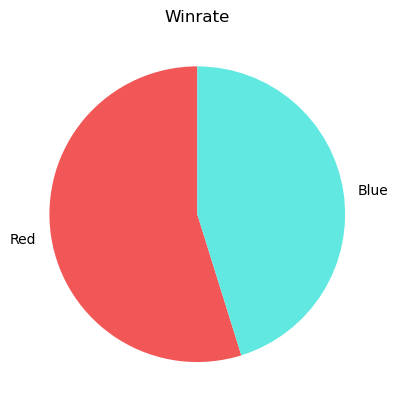

In [59]:
team_dict = {False: "Red",
             True: "Blue"}
labels, winrate = np.unique(df["blueWins"], return_counts=True)
labels = [team_dict.get(label) for label in labels]
color = ["#F25757","#61E8E1"]
plt.pie(winrate, labels=labels, colors=color, startangle=90 )
plt.title("Winrate")
plt.show()

### Wards Placed

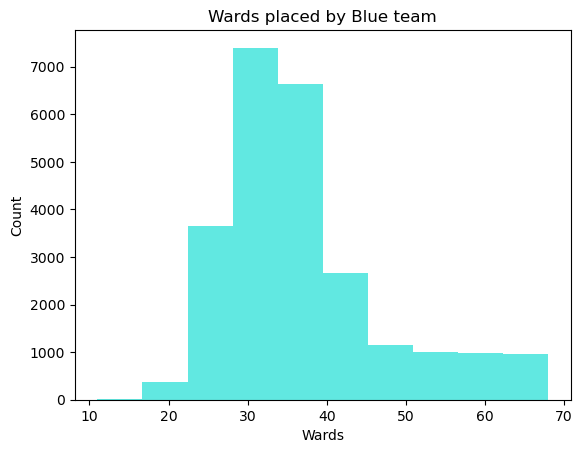

In [71]:
blue_wards_placed = df["blueWardsPlaced"]
plt.hist(blue_wards_placed, color="#61E8E1")
plt.title("Wards placed by Blue team")
plt.xlabel("Wards")
plt.ylabel("Count")
plt.show()

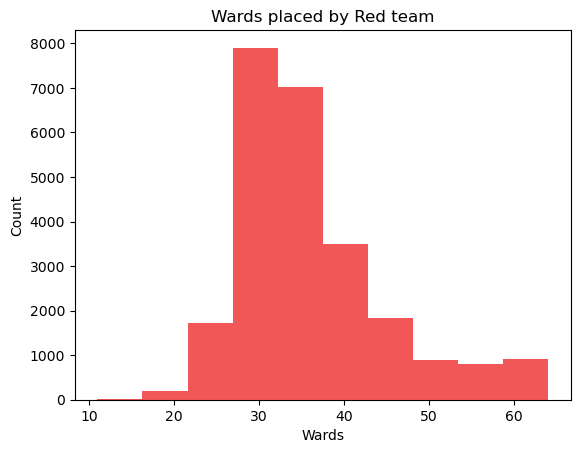

In [72]:
red_wards_placed = df["redWardsPlaced"]
plt.hist(red_wards_placed, color="#F25757")
plt.title("Wards placed by Red team")
plt.xlabel("Wards")
plt.ylabel("Count")
plt.show()

### Wards Destroyed

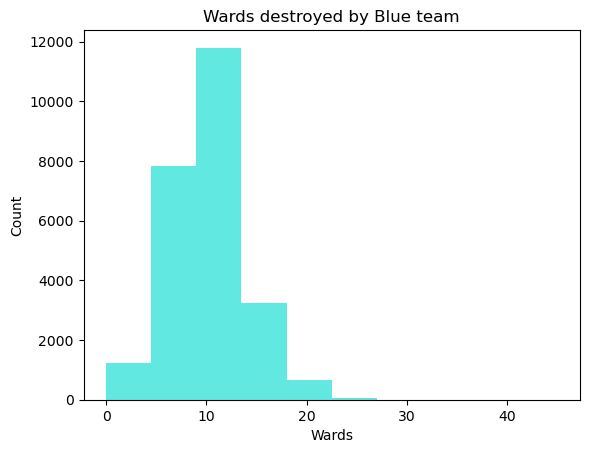

In [73]:
blue_wards_placed = df["blueWardsDestroyed"]
plt.hist(blue_wards_placed, color="#61E8E1")
plt.title("Wards destroyed by Blue team")
plt.xlabel("Wards")
plt.ylabel("Count")
plt.show()

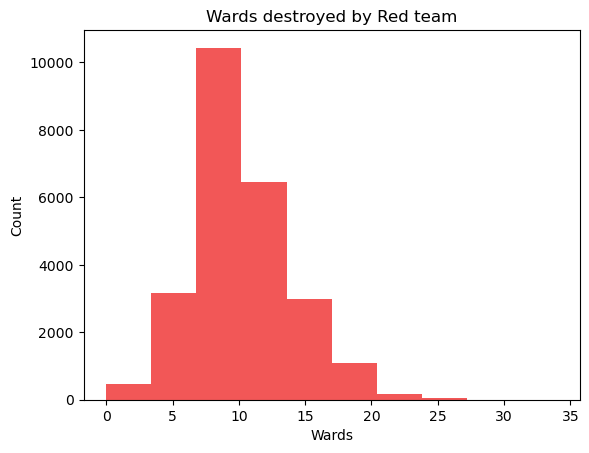

In [74]:
red_wards_placed = df["redWardsDestroyed"]
plt.hist(red_wards_placed, color="#F25757")
plt.title("Wards destroyed by Red team")
plt.xlabel("Wards")
plt.ylabel("Count")
plt.show()